In [216]:
# Data Frames 

In [217]:
import pandas as pd 
import numpy as np 

In [218]:
cars_cap = [922,2345,5,213,243,25,1235]
country = ['US', 'Aus', 'Jap', 'Ind', 'Rus', 'Mor', 'Egy']

In [219]:
cars_dict = {"cars_per_cap" : cars_cap, "Country" : country}
cars = pd.DataFrame(cars_dict)
cars

,cars_per_cap,Country
0,922,US
1,2345,Aus
2,5,Jap
3,213,Ind
4,243,Rus
5,25,Mor
6,1235,Egy


In [220]:
# pd.read_csv(filepath, sep=',', header='infer')
# You can specify the following details:

# 1. separator (by default ‘,’)
# 2. header (takes the top row by default, if not specified)
# 3. names (list of column name)

In [221]:
sales = pd.read_excel("sales.xlsx", index_col = 1)
sales.head() # head function to see first 5 rows 

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99


In [222]:
sales.tail() # tail function to see last 5 rows 

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western US,USCA,490,44303.65,251991.83
Southern US,USCA,255,19991.83,148771.91
Eastern US,USCA,443,47462.04,264973.98
Central US,USCA,356,33697.43,170416.31
Canada,USCA,49,7246.62,26298.81


In [223]:
sales.info() # gives us the info/detail about the sales file

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Western Africa to Canada
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Market        23 non-null     object 
 1   No_of_Orders  23 non-null     int64  
 2   Profit        23 non-null     float64
 3   Sales         23 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 920.0+ bytes


In [224]:
sales.describe() # gives us the detail about the what is the central tendency (mean, median, min, max, etc.),
# dispersion,

,No_of_Orders,Profit,Sales
count,23.000000,23.000000,23.000000
mean,366.478261,28859.944783,206285.108696
std,246.590361,27701.193773,160589.886606
min,37.000000,-16766.900000,8190.740000
25%,211.500000,12073.085000,82587.475000
50%,356.000000,20948.840000,170416.310000
75%,479.500000,45882.845000,290182.375000
max,964.000000,82091.270000,656637.140000


<function matplotlib.pyplot.show(close=None, block=None)>

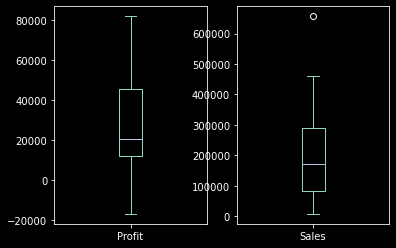

In [225]:
import matplotlib.pyplot as plt 
sales[["Profit", "Sales"]].plot(kind = "box", subplots = True)
plt.style.use('dark_background')
plt.show

In [226]:
# Indexing 
print(sales[["Profit"]].head())
print(type(sales[["Profit"]].head()))  # double [[]] gives us the data frame
print(type(sales["Profit"].head())) # single [] gives us the series data structure

                   Profit
Region                   
Western Africa  -12901.51
Southern Africa  11768.58
North Africa     21643.08
Eastern Africa    8013.04
Central Africa   15606.30
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [227]:
# location-based Indexing (loc)
sales.loc["Canada"]

Market              USCA
No_of_Orders          49
Profit           7246.62
Sales           26298.81
Name: Canada, dtype: object

In [228]:
sales.loc[["Canada", "Western Africa"]]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Canada,USCA,49,7246.62,26298.81
Western Africa,Africa,251,-12901.51,78476.06


In [229]:
# You can use the loc method to extract rows and columns from a dataframe 
# dataframe.loc[[list_of_row_labels], [list_of_column_labels]]
sales.loc[["Canada", "Western Africa"], ["Profit","Sales"]]

,Profit,Sales
Region,,
Canada,7246.62,26298.81
Western Africa,-12901.51,78476.06


In [230]:
# position-based indexing
# dataframe.iloc[rows, columns]
sales.iloc[0:5, 2:]

,Profit,Sales
Region,,
Western Africa,-12901.51,78476.06
Southern Africa,11768.58,51319.50
North Africa,21643.08,86698.89
Eastern Africa,8013.04,44182.60
Central Africa,15606.30,61689.99


In [231]:
# Subsetting Rows Based on Conditions 
sales[sales["Profit"] > 0].count()

Market          20
No_of_Orders    20
Profit          20
Sales           20
dtype: int64

In [232]:
# Multiple Conditons
sales[(sales["Sales"] > 250000) & (sales["Market"].isin(["LATAM", "Europe"])) ]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,82091.27,656637.14
Northern Europe,Europe,367,43237.44,252969.09
Central America,LATAM,930,74679.54,461670.28


In [233]:
# modifying Data Frames (Readable)
# sales.Sales = sales.Sales.floordiv(100)
# sales.head()

In [234]:
help(pd.DataFrame.rename) # used to see all the methods and properties of a function

Help on function rename in module pandas.core.frame:

rename(self, mapper: 'Renamer | None' = None, *, index: 'Renamer | None' = None, columns: 'Renamer | None' = None, axis: 'Axis | None' = None, copy: 'bool' = True, inplace: 'bool' = False, level: 'Level | None' = None, errors: 'str' = 'ignore') -> 'DataFrame | None'
    Alter axes labels.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternative to specifying axis (``mapper, axis=0``
        is equivalent to ``index=mapper``).
    colu

In [235]:
# Lambda functions 
sales["Positive Profit"] = sales.Profit.apply(lambda x : np.nan if x < 0 else x )
sales

,Market,No_of_Orders,Profit,Sales,Positive Profit
Region,,,,,
Western Africa,Africa,251,-12901.51,78476.06,NaN
Southern Africa,Africa,85,11768.58,51319.50,11768.58
North Africa,Africa,182,21643.08,86698.89,21643.08
Eastern Africa,Africa,110,8013.04,44182.60,8013.04
Central Africa,Africa,103,15606.30,61689.99,15606.30
Western Asia,Asia Pacific,382,-16766.90,124312.24,NaN
Southern Asia,Asia Pacific,469,67998.76,351806.60,67998.76
Southeastern Asia,Asia Pacific,533,20948.84,329751.38,20948.84
Oceania,Asia Pacific,646,54734.02,408002.98,54734.02


In [236]:
# hierarichal indexing 
sales.reset_index(inplace = True)
sales.set_index(["Market", "Region"], inplace = True)
sales

No_of_Orders    Profit      Sales  \
Market       Region                                                 
Africa       Western Africa              251 -12901.51   78476.06   
             Southern Africa              85  11768.58   51319.50   
             North Africa                182  21643.08   86698.89   
             Eastern Africa              110   8013.04   44182.60   
             Central Africa              103  15606.30   61689.99   
Asia Pacific Western Asia                382 -16766.90  124312.24   
             Southern Asia               469  67998.76  351806.60   
             Southeastern Asia           533  20948.84  329751.38   
             Oceania                     646  54734.02  408002.98   
             Eastern Asia                414  72805.10  315390.77   
             Central Asia                 37  -2649.76    8190.74   
Europe       Western Europe              964  82091.27  656637.14   
             Southern Europe             338  18911.49  215703.93   
             Northern Europe             367  43237.44  252969.09   
             Eastern Europe              241  25050.69  108258.93   
LATAM        South America               496  12377.59  210710.49   
             Central America             930  74679.54  461670.28   
             Caribbean                   288  13529.59  116333.05   
USCA         Western US                  490  44303.65  251991.83   
             Southern US                 255  19991.83  148771.91   
             Eastern US                  443  47462.04  264973.98   
             Central US                  356  33697.43  170416.31   
             Canada                       49   7246.62   26298.81   

                                Positive Profit  
Market       Region                              
Africa       Western Africa                 NaN  
             Southern Africa           11768.58  
             North Africa              21643.08  
             Eastern Africa             8013.04  
             Central Africa            15606.30  
Asia Pacific Western Asia                   NaN  
             Southern Asia             67998.76  
             Southeastern Asia         20948.84  
             Oceania                   54734.02  
             Eastern Asia              72805.10  
             Central Asia                   NaN  
Europe       Western Europe            82091.27  
             Southern Europe           18911.49  
             Northern Europe           43237.44  
             Eastern Europe            25050.69  
LATAM        South America             12377.59  
             Central America           74679.54  
             Caribbean                 13529.59  
USCA         Western US                44303.65  
             Southern US               19991.83  
             Eastern US                47462.04  
             Central US                33697.43  
             Canada                     7246.62

In [237]:
sales.loc["Africa"]

,No_of_Orders,Profit,Sales,Positive Profit
Region,,,,
Western Africa,251,-12901.51,78476.06,NaN
Southern Africa,85,11768.58,51319.50,11768.58
North Africa,182,21643.08,86698.89,21643.08
Eastern Africa,110,8013.04,44182.60,8013.04
Central Africa,103,15606.30,61689.99,15606.30


In [238]:
sales.loc[[("Europe", "Western Europe")]]

,,No_of_Orders,Profit,Sales,Positive Profit
Market,Region,,,,
Europe,Western Europe,964,82091.27,656637.14,82091.27


In [239]:
# Grouping
# Grouping analysis can be thought of as having three parts:
# 1.Splitting the data into groups (e.g., groups of customer segments, product categories, etc.)
# 2.Applying a function to each group (e.g., the mean or total sales of each customer segment)
# 3.Combining the results into a data structure showing summary statistics

In [240]:
print(sales[["No_of_Orders","Profit"]].groupby("Market").sum()) # grouping market's total order & Profits
# to get a whole view
type(sales[["No_of_Orders","Profit"]].groupby("Market"))

              No_of_Orders     Profit
Market                               
Africa                 731   44129.49
Asia Pacific          2481  197070.06
Europe                1910  169290.89
LATAM                 1714  100586.72
USCA                  1593  152701.57


pandas.core.groupby.generic.DataFrameGroupBy

In [241]:
# method to find the max of orders and Profits
sales[["No_of_Orders","Profit"]].groupby("Market").max()

,No_of_Orders,Profit
Market,,
Africa,251,21643.08
Asia Pacific,646,72805.10
Europe,964,82091.27
LATAM,930,74679.54
USCA,490,47462.04


In [242]:
# method to find the mean of orders and Profits
sales[["No_of_Orders","Profit"]].groupby("Market").mean() 
# same goes for min, quartiles etc

,No_of_Orders,Profit
Market,,
Africa,146.200000,8825.898000
Asia Pacific,413.500000,32845.010000
Europe,477.500000,42322.722500
LATAM,571.333333,33528.906667
USCA,318.600000,30540.314000


In [243]:
# Pivoting 
# It acts as an alternative to the groupby() function in Pandas. 
# Pivot tables provide excel-like functionalities to create aggregate tables. 

In [244]:
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})

users.set_index("weekday", inplace = True)
users

,city,visitors,signups
weekday,,,
Sun,Austin,139,7
Sun,Dallas,237,12
Mon,Austin,326,3
Mon,Dallas,456,5


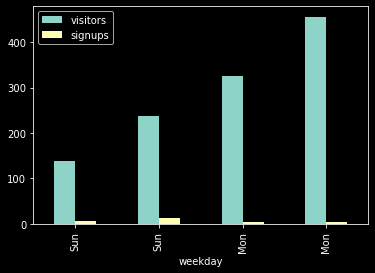

In [245]:
users.plot(kind = "bar")
plt.style.use('dark_background')
plt.show()

In [246]:
# df.pivot(columns='grouping_variable_col', values='value_to_aggregate', index='grouping_variable_row')
visitor_pivot = users.pivot(columns = "city" , values = "visitors" , )
visitor_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


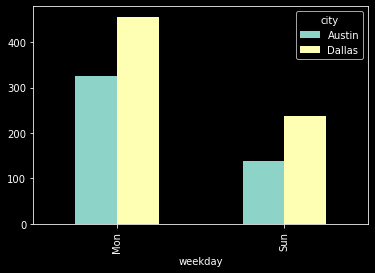

In [247]:
visitor_pivot.plot(kind = "bar")
plt.style.use('dark_background')

In [248]:
visitors_signups = users.pivot(columns = "city")
visitors_signups

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

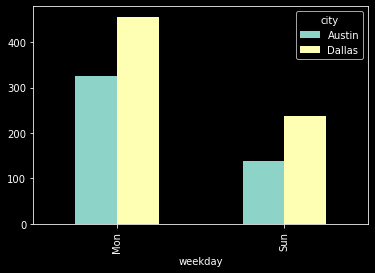

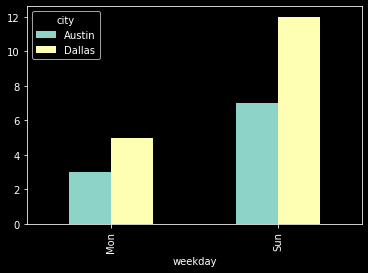

In [249]:
visitors_signups["visitors"].plot(kind = "bar")
visitors_signups["signups"].plot(kind = "bar")
plt.style.use('dark_background')
plt.show()

In [250]:
# Using the pivot_table() function, you can specify the aggregate function

# you would want Pandas to execute over the columns provided. It could be the same or
# different for each column in the dataframe.

# df.pivot_table(values, index, aggfunc={'value_1': np.mean,'value_2': [min, max, np.mean]})

# When substituted with proper values, the function above will result in 
# a mean value of value_1 and three values (minimum, maximum and a mean of value_2) for each row.

In [251]:
 # Merge And Append

In [252]:
orders = pd.read_excel("sales_returns.xlsx", sheet_name = "Orders")
returns = pd.read_excel("sales_returns.xlsx", sheet_name = "Returns")

In [253]:
print(orders.shape)
print(returns.shape)

(25728, 4)
(1079, 2)


In [254]:
orders.head()

,Order ID,Market,Profit,Sales
0,AG-2012-AA6453-41020,Africa,53.76,298.68
1,AG-2012-AC4203-40915,Africa,14.58,91.38
2,AG-2012-AH2103-41133,Africa,11.04,276.96
3,AG-2012-AJ7803-40978,Africa,7.17,35.97
4,AG-2012-AS2853-41235,Africa,15.36,54.90


In [255]:
returns.head()

,Returned,Order ID
0,Yes,CA-2012-SA20830140-41210
1,Yes,IN-2012-PB19210127-41259
2,Yes,CA-2012-SC20095140-41174
3,Yes,IN-2015-JH158207-42140
4,Yes,IN-2014-LC168857-41747


In [256]:
# merging
# Command to merge two dataframes:
# dataframe_1.merge(dataframe_2, on = ['column_1', 'column_2'], how = '____') 

return_order = orders.merge(returns, on = "Order ID")
print(return_order.head())
print(return_order.shape)

                Order ID  Market  Profit    Sales Returned
0  AG-2013-PO88653-41634  Africa  191.25  1932.24      Yes
1  AG-2014-CM21603-41755  Africa   10.32    43.05      Yes
2  AG-2014-CP20853-41889  Africa   14.10    84.72      Yes
3  AG-2014-RD95853-41712  Africa   21.03    64.38      Yes
4  AO-2013-JE57454-41544  Africa  106.59   499.23      Yes
(1079, 5)


In [257]:
return_order = orders.merge(returns, on = "Order ID", how = "left")
return_order

,Order ID,Market,Profit,Sales,Returned
0,AG-2012-AA6453-41020,Africa,53.7600,298.680,NaN
1,AG-2012-AC4203-40915,Africa,14.5800,91.380,NaN
2,AG-2012-AH2103-41133,Africa,11.0400,276.960,NaN
3,AG-2012-AJ7803-40978,Africa,7.1700,35.970,NaN
4,AG-2012-AS2853-41235,Africa,15.3600,54.900,NaN
...,...,...,...,...,...
25723,US-2015-VM21835140-42252,USCA,6.9654,14.820,NaN
25724,US-2015-WB21850140-42349,USCA,12.8767,91.193,NaN
25725,US-2015-XP21865140-42287,USCA,16.5440,35.200,NaN
25726,US-2015-XP21865140-42323,USCA,-22.7882,212.992,NaN


In [258]:
# Changing NaN in (returned) column to (nan) string
return_order['Returned'] = return_order['Returned'].astype('str')
return_order.head()

,Order ID,Market,Profit,Sales,Returned
0,AG-2012-AA6453-41020,Africa,53.76,298.68,nan
1,AG-2012-AC4203-40915,Africa,14.58,91.38,nan
2,AG-2012-AH2103-41133,Africa,11.04,276.96,nan
3,AG-2012-AJ7803-40978,Africa,7.17,35.97,nan
4,AG-2012-AS2853-41235,Africa,15.36,54.90,nan


In [259]:
return_order['Returned'] = return_order['Returned'].apply(lambda x: "No" if x == 'nan' else "Yes")
return_order

,Order ID,Market,Profit,Sales,Returned
0,AG-2012-AA6453-41020,Africa,53.7600,298.680,No
1,AG-2012-AC4203-40915,Africa,14.5800,91.380,No
2,AG-2012-AH2103-41133,Africa,11.0400,276.960,No
3,AG-2012-AJ7803-40978,Africa,7.1700,35.970,No
4,AG-2012-AS2853-41235,Africa,15.3600,54.900,No
...,...,...,...,...,...
25723,US-2015-VM21835140-42252,USCA,6.9654,14.820,No
25724,US-2015-WB21850140-42349,USCA,12.8767,91.193,No
25725,US-2015-XP21865140-42287,USCA,16.5440,35.200,No
25726,US-2015-XP21865140-42323,USCA,-22.7882,212.992,No


In [260]:
# Concatenating DataFrames 
df1 = pd.DataFrame({'Name': ['Aman', 'Joy', 'Rashmi', 'Saif'],
                    'Age' : ['34', '31', '22', '33'], 
                    'Gender': ['M', 'M', 'F', 'M']}
                  )

df2 = pd.DataFrame({'Name': ['Akhil', 'Asha', 'Preeti'],
                    'Age' : ['31', '22', '23'], 
                    'Gender': ['M', 'F', 'F']}
                  )
df3 = pd.DataFrame({'School': ['RK Public', 'JSP', 'Carmel Convent', 'St. Paul'],
                    'Graduation Marks': ['84', '89', '76', '91']}
                  )

In [261]:
pd.concat([df1,df3], axis = 1) 
# pd.concat([dataframe_1, dataframe_2], axis = _) 
# To append rows, you have to set the axis value as 0. For adding columns from one dataframe to another,
# the axis value must be set as 1. If there are any extra columns or rows with no values,
# they are replaced with ‘NaN’.

,Name,Age,Gender,School,Graduation Marks
0,Aman,34,M,RK Public,84
1,Joy,31,M,JSP,89
2,Rashmi,22,F,Carmel Convent,76
3,Saif,33,M,St. Paul,91


In [262]:
df1.append(df2)

C:\Users\Wayne\AppData\Local\Temp\ipykernel_19684\3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,Name,Age,Gender
0,Aman,34,M
1,Joy,31,M
2,Rashmi,22,F
3,Saif,33,M
0,Akhil,31,M
1,Asha,22,F
2,Preeti,23,F


In [263]:
# Apart from the merge, append() or concat(), you can also perform mathematical operations to combine
# multiple dataframes. When two dataframes have the same row and column labels,
# you can directly use the mathematical operators provided in the list below:

# add(): +
# sub(): -
# mul(): *
# div(): /
# floordiv(): //
# mod(): %
# pow() :**

# there is a link (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.add.html)
# that gives us the documentation about this

In [264]:
# Handling Time-Series Data

In [265]:
weather = pd.read_csv("weather_data.csv")
weather.head()

,Temperature,DewPoint,Pressure,Date_Time
0,46.2,37.5,1,20100101 00:00
1,44.6,37.1,1,20100101 01:00
2,44.1,36.9,1,20100101 02:00
3,43.8,36.9,1,20100101 03:00
4,43.5,36.8,1,20100101 04:00


In [266]:
weather = pd.read_csv("weather_data.csv" , parse_dates = ["Date_Time"])
weather.head()

,Temperature,DewPoint,Pressure,Date_Time
0,46.2,37.5,1,2010-01-01 00:00:00
1,44.6,37.1,1,2010-01-01 01:00:00
2,44.1,36.9,1,2010-01-01 02:00:00
3,43.8,36.9,1,2010-01-01 03:00:00
4,43.5,36.8,1,2010-01-01 04:00:00


In [267]:
# If a date-time variable has values in the form of a string, you can call the ‘parse_dates’ function while
# loading the data into the Pandas dataframe. This will convert the format into date-time for the
# appropriate variable. Also, when working with a time series, it is advisable to convert a column into 
# an index for analysis. 
weather = pd.read_csv("weather_data.csv", parse_dates = True, index_col = 'Date_Time')
weather.head()

,Temperature,DewPoint,Pressure
Date_Time,,,
2010-01-01 00:00:00,46.2,37.5,1
2010-01-01 01:00:00,44.6,37.1,1
2010-01-01 02:00:00,44.1,36.9,1
2010-01-01 03:00:00,43.8,36.9,1
2010-01-01 04:00:00,43.5,36.8,1


In [268]:
# to delete the index (Date_time) we can use 

weather.index.name = None 
weather.head()

,Temperature,DewPoint,Pressure
2010-01-01 00:00:00,46.2,37.5,1
2010-01-01 01:00:00,44.6,37.1,1
2010-01-01 02:00:00,44.1,36.9,1
2010-01-01 03:00:00,43.8,36.9,1
2010-01-01 04:00:00,43.5,36.8,1


<function matplotlib.pyplot.show(close=None, block=None)>

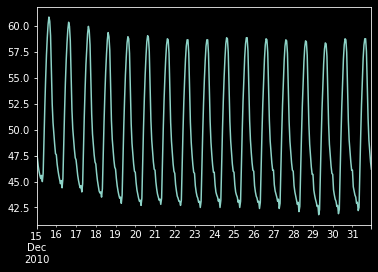

In [269]:
# Time Visualisation 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
dec = weather.loc['2010-12-15' : '2010-12-31']
dec['Temperature'].plot(kind = "line")
plt.show